# Spearman Correlation Work #

# VDISP #

Spearman correlation between RESIDUAL and VDISP:
ρ (rho) = -0.1570
p-value = 0.2044


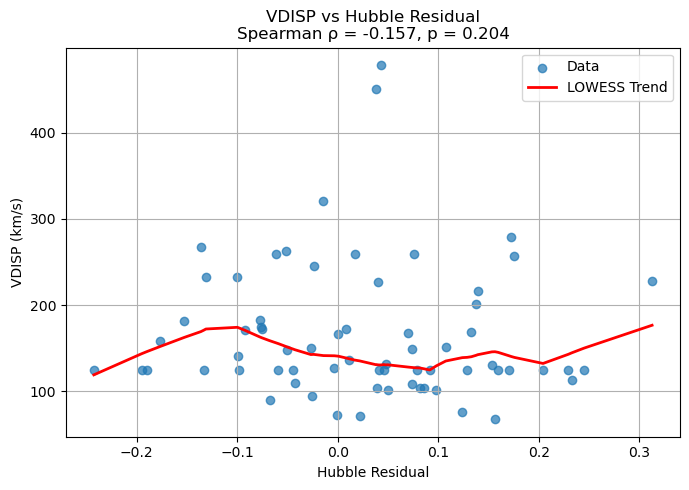

In [ ]:
n

# LOGMSTAR #

Spearman correlation between RESIDUAL and LOGMSTAR:
ρ (rho) = -0.1303
p-value = 0.2934


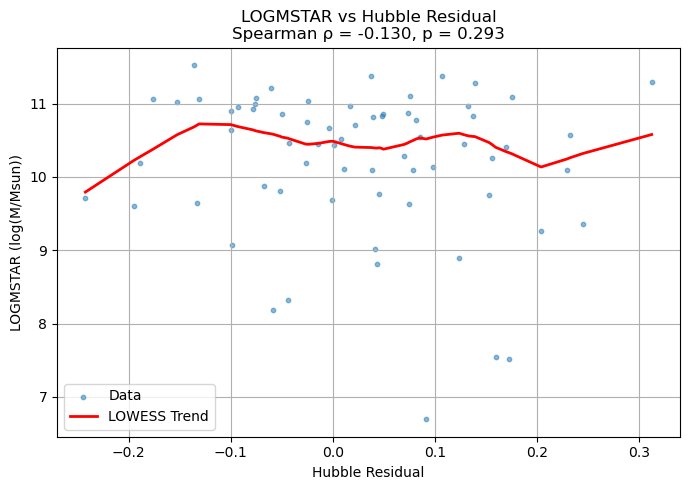

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.stats import spearmanr
import statsmodels.api as sm  # for LOWESS

# === Load your data ===
data = Table.read("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR_mstar_color_g-r.fits")

# === Define keys ===
x_key = "RESIDUAL"  # Hubble residuals
y_key = "LOGMSTAR"     # LOGMSTAR

# === Mask valid values ===
x_mask = ~data[x_key].mask if hasattr(data[x_key], "mask") else np.ones(len(data), dtype=bool)
y_mask = ~data[y_key].mask if hasattr(data[y_key], "mask") else np.ones(len(data), dtype=bool)
mask = x_mask & y_mask

x = np.array(data[x_key][mask])
y = np.array(data[y_key][mask])

# === Spearman correlation ===
rho, pval = spearmanr(x, y)
print(f"Spearman correlation between {x_key} and {y_key}:")
print(f"ρ (rho) = {rho:.4f}")
print(f"p-value = {pval:.4g}")

# === LOWESS smoothing ===
smoothed = sm.nonparametric.lowess(y, x, frac=0.3)

# === Plot ===
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.5, s=10, label="Data")
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=2, label="LOWESS Trend")
plt.xlabel("Hubble Residual")
plt.ylabel("LOGMSTAR (log(M/Msun))")
plt.title(f"LOGMSTAR vs Hubble Residual\nSpearman ρ = {rho:.3f}, p = {pval:.3f}")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# DN4000 #

Spearman correlation between DN4000 and RESIDUAL:
ρ (rho) = -0.2317
p-value = 0.05925


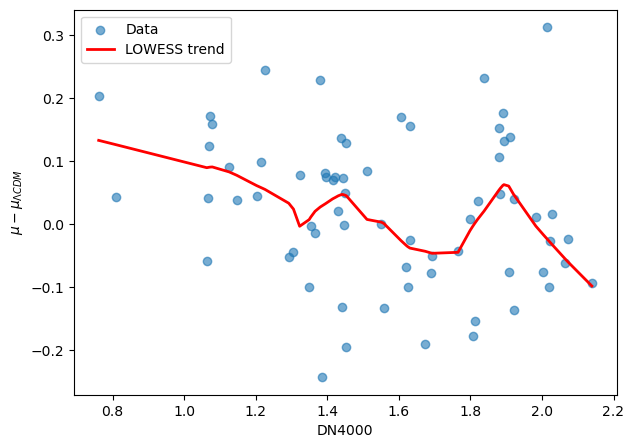

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.stats import spearmanr
import statsmodels.api as sm

# Load your data
data = Table.read("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR_mstar_color_g-r.fits")

# Mask for valid values
mask = (~data["DN4000"].mask if hasattr(data["DN4000"], "mask") else np.ones(len(data), dtype=bool)) & \
       (~data["RESIDUAL"].mask if hasattr(data["RESIDUAL"], "mask") else np.ones(len(data), dtype=bool))

x = np.array(data["DN4000"][mask])
y = np.array(data["RESIDUAL"][mask])

# Compute Spearman rho for reference
rho, pval = spearmanr(x, y)

# Fit LOWESS
lowess = sm.nonparametric.lowess
smoothed = lowess(y, x, frac=0.3)  # frac = smoothing span (0.2–0.5 is typical)

print(f"Spearman correlation between DN4000 and RESIDUAL:")
print(f"ρ (rho) = {rho:.4f}")
print(f"p-value = {pval:.4g}")

# Plot
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.6, label="Data")
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=2, label="LOWESS trend")
plt.xlabel("DN4000")
plt.ylabel(r"$\mu - \mu_{\Lambda CDM}$")
plt.legend()
plt.show()

# SFR #

Spearman correlation between SFR and RESIDUAL:
ρ (rho) = 0.2029
p-value = 0.09966


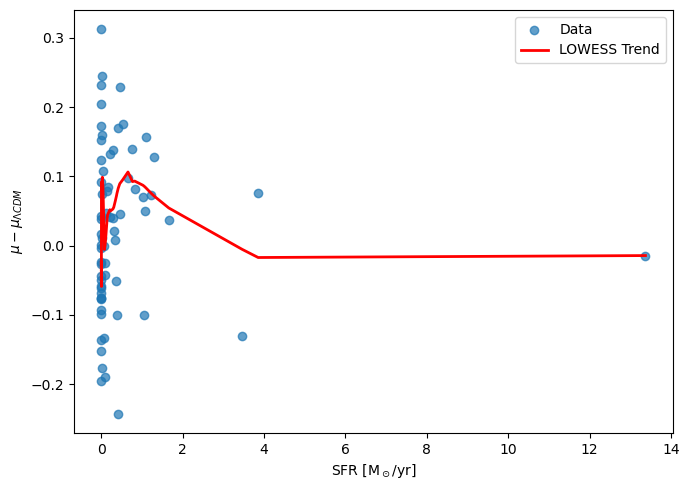

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.stats import spearmanr
import statsmodels.api as sm  # Needed for LOWESS

# Load your data
data = Table.read("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR_mstar_color_g-r.fits")

# Build mask for valid data
mask = (~data["SFR"].mask if hasattr(data["SFR"], "mask") else np.ones(len(data), dtype=bool)) & \
       (~data["RESIDUAL"].mask if hasattr(data["RESIDUAL"], "mask") else np.ones(len(data), dtype=bool))

x = np.array(data["SFR"][mask])
y = np.array(data["RESIDUAL"][mask])

# Spearman correlation
rho, pval = spearmanr(x, y)
print(f"Spearman correlation between SFR and RESIDUAL:")
print(f"ρ (rho) = {rho:.4f}")
print(f"p-value = {pval:.4g}")

# LOWESS smoothing
lowess = sm.nonparametric.lowess
smoothed = lowess(y, x, frac=0.3)  # You can adjust frac (e.g. 0.2–0.5)

# Plot
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.7, label="Data")
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=2, label="LOWESS Trend")
plt.xlabel("SFR [M$_\\odot$/yr]")
plt.ylabel(r"$\mu - \mu_{\Lambda CDM}$")
plt.legend()
plt.tight_layout()
plt.show()

# LOG SFR #

Spearman correlation between log10(SFR) and RESIDUAL:
ρ (rho) = 0.0813
p-value = 0.6089


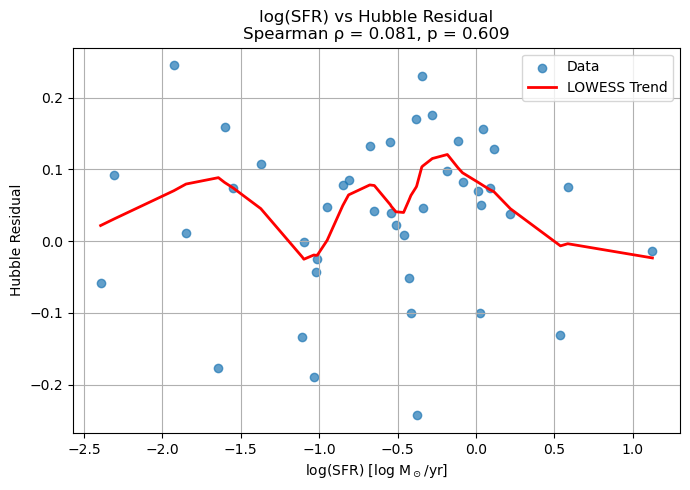

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.stats import spearmanr
import statsmodels.api as sm  # Needed for LOWESS

# Load your data
data = Table.read("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR_mstar_color_g-r.fits")

# Build mask: SFR must be > 0, RESIDUAL must not be masked or NaN
sfr = np.array(data["SFR"])
resid = np.array(data["RESIDUAL"])

mask = np.isfinite(sfr) & (sfr > 0) & np.isfinite(resid)

x = np.log10(sfr[mask])  # Compute log10(SFR)
y = resid[mask]

# Spearman correlation
rho, pval = spearmanr(x, y)
print(f"Spearman correlation between log10(SFR) and RESIDUAL:")
print(f"ρ (rho) = {rho:.4f}")
print(f"p-value = {pval:.4g}")

# LOWESS smoothing
lowess = sm.nonparametric.lowess
smoothed = lowess(y, x, frac=0.3)

# Plot
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.7, label="Data")
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=2, label="LOWESS Trend")
plt.xlabel("log(SFR) [log M$_\\odot$/yr]")
plt.ylabel("Hubble Residual")
plt.title(f"log(SFR) vs Hubble Residual\nSpearman ρ = {rho:.3f}, p = {pval:.3f}")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ABSMAG01_SDSS_R #

Spearman correlation between ABSMAG01_SDSS_R and RESIDUAL:
ρ (rho) = 0.1483
p-value = 0.2309


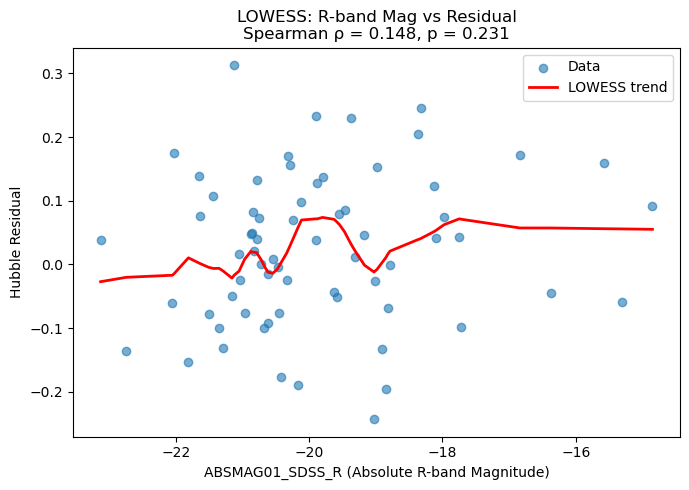

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.stats import spearmanr
import statsmodels.api as sm

# Load your data
data = Table.read("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR_mstar_color_g-r.fits")

# Mask valid data
mask = (~data["ABSMAG01_SDSS_R"].mask if hasattr(data["ABSMAG01_SDSS_R"], "mask") else np.ones(len(data), dtype=bool)) & \
       (~data["RESIDUAL"].mask if hasattr(data["RESIDUAL"], "mask") else np.ones(len(data), dtype=bool))

x = np.array(data["ABSMAG01_SDSS_R"][mask])
y = np.array(data["RESIDUAL"][mask])

# Spearman for reference
rho, pval = spearmanr(x, y)
print(f"Spearman correlation between ABSMAG01_SDSS_R and RESIDUAL:")
print(f"ρ (rho) = {rho:.4f}")
print(f"p-value = {pval:.4g}")

# LOWESS smoothing
lowess = sm.nonparametric.lowess
smoothed = lowess(y, x, frac=0.3)  # You can tweak frac (e.g., 0.2–0.5)

# Plot
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.6, label="Data")
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=2, label="LOWESS trend")
plt.xlabel("ABSMAG01_SDSS_R (Absolute R-band Magnitude)")
plt.ylabel("Hubble Residual")
plt.title(f"LOWESS: R-band Mag vs Residual\nSpearman ρ = {rho:.3f}, p = {pval:.3f}")
plt.legend()
plt.tight_layout()
plt.show()

# LOGSSFR #

Spearman correlation between LOGSSFR and RESIDUAL:
ρ (rho) = 0.0043
p-value = 0.9785


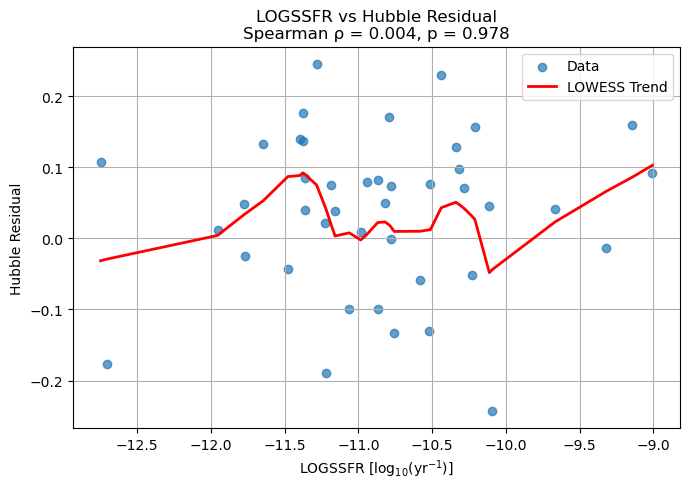

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.stats import spearmanr
import statsmodels.api as sm  # for LOWESS

# Load your data
data = Table.read("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR_mstar_color_g-r.fits")

# Build mask for valid LOGSSFR and RESIDUAL
mask = (~data["LOGSSFR"].mask if hasattr(data["LOGSSFR"], "mask") else np.ones(len(data), dtype=bool)) & \
       (~data["RESIDUAL"].mask if hasattr(data["RESIDUAL"], "mask") else np.ones(len(data), dtype=bool))

x = np.array(data["LOGSSFR"][mask])
y = np.array(data["RESIDUAL"][mask])

# Spearman correlation
rho, pval = spearmanr(x, y)
print(f"Spearman correlation between LOGSSFR and RESIDUAL:")
print(f"ρ (rho) = {rho:.4f}")
print(f"p-value = {pval:.4g}")

# LOWESS smoothing
lowess = sm.nonparametric.lowess
smoothed = lowess(y, x, frac=0.3)

# Plot
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.7, label="Data")
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=2, label="LOWESS Trend")
plt.xlabel("LOGSSFR [log$_{10}$(yr$^{-1}$)]")
plt.ylabel("Hubble Residual")
plt.title(f"LOGSSFR vs Hubble Residual\nSpearman ρ = {rho:.3f}, p = {pval:.3f}")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# MSTAR #

Spearman correlation between MSTAR and RESIDUAL:
ρ (rho) = -0.1303
p-value = 0.2934


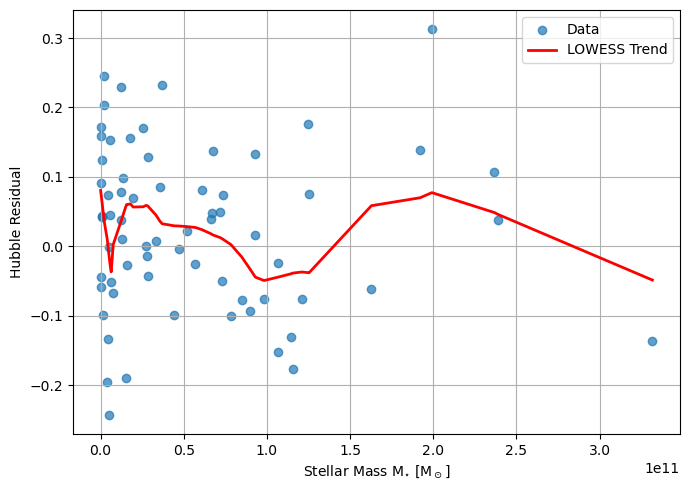

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.stats import spearmanr
import statsmodels.api as sm  # for LOWESS

# Load your data
data = Table.read("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR_mstar_color_g-r.fits")

# Build mask for valid MSTAR and RESIDUAL
mask = (~data["MSTAR"].mask if hasattr(data["MSTAR"], "mask") else np.ones(len(data), dtype=bool)) & \
       (~data["RESIDUAL"].mask if hasattr(data["RESIDUAL"], "mask") else np.ones(len(data), dtype=bool))

x = np.array(data["MSTAR"][mask])
y = np.array(data["RESIDUAL"][mask])

# Spearman correlation
rho, pval = spearmanr(x, y)
print(f"Spearman correlation between MSTAR and RESIDUAL:")
print(f"ρ (rho) = {rho:.4f}")
print(f"p-value = {pval:.4g}")

# LOWESS smoothing
lowess = sm.nonparametric.lowess
smoothed = lowess(y, x, frac=0.3)

# Plot
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.7, label="Data")
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=2, label="LOWESS Trend")
plt.xlabel("Stellar Mass M$_{\\star}$ [M$_\\odot$]")
plt.ylabel("Hubble Residual")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# LOGMSTAR #

Spearman correlation between LOGMSTAR and RESIDUAL:
ρ (rho) = -0.1303
p-value = 0.2934


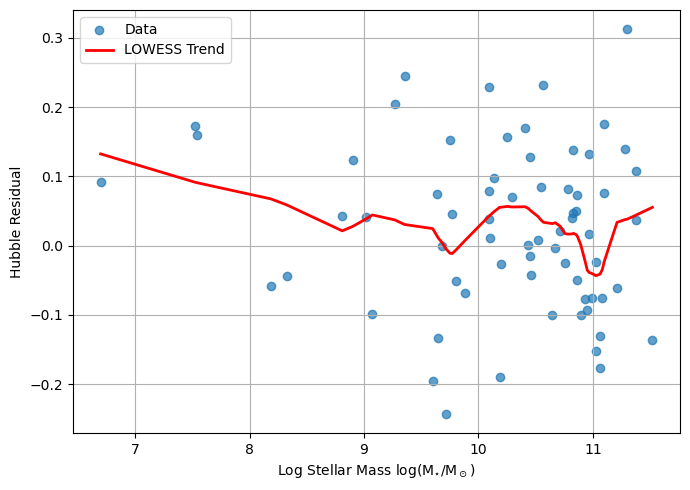

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.stats import spearmanr
import statsmodels.api as sm  # for LOWESS

# === Load the data ===
data = Table.read("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR_mstar_color_g-r.fits")

# === Use LOGMSTAR instead of MSTAR ===
x_key = "LOGMSTAR"
y_key = "RESIDUAL"

# === Create mask for valid data ===
x_mask = ~data[x_key].mask if hasattr(data[x_key], "mask") else np.ones(len(data), dtype=bool)
y_mask = ~data[y_key].mask if hasattr(data[y_key], "mask") else np.ones(len(data), dtype=bool)
mask = x_mask & y_mask

x = np.array(data[x_key][mask])
y = np.array(data[y_key][mask])

# === Spearman correlation ===
rho, pval = spearmanr(x, y)
print(f"Spearman correlation between {x_key} and {y_key}:")
print(f"ρ (rho) = {rho:.4f}")
print(f"p-value = {pval:.4g}")

# === LOWESS smoothing ===
smoothed = sm.nonparametric.lowess(y, x, frac=0.3)

# === Plot ===
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.7, label="Data")
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=2, label="LOWESS Trend")
plt.xlabel("Log Stellar Mass log(M$_{\\star}$/M$_\\odot$)")
plt.ylabel("Hubble Residual")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# COLOR G-R #

Spearman correlation between COLOR_G-R and RESIDUAL:
ρ (rho) = -0.2804
p-value = 0.02153


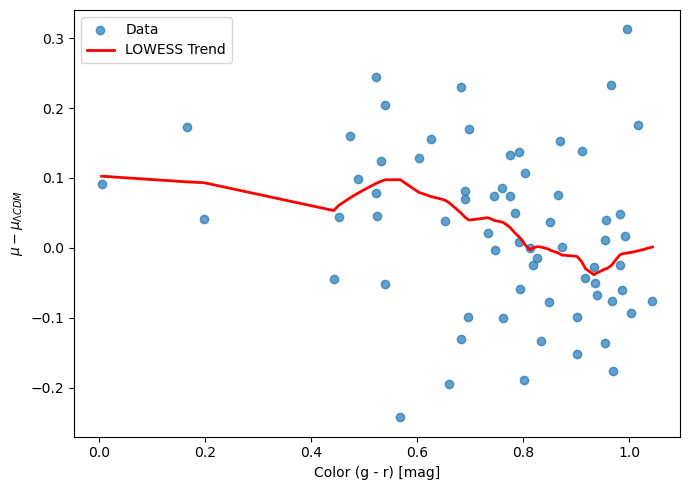

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from scipy.stats import spearmanr
import statsmodels.api as sm  # for LOWESS

# === Load the data ===
data = Table.read("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR_mstar_color_g-r.fits")

# === Use COLOR_G-R instead of MSTAR ===
x_key = "COLOR_G-R"
y_key = "RESIDUAL"

# === Create mask for valid data ===
x_mask = ~data[x_key].mask if hasattr(data[x_key], "mask") else np.ones(len(data), dtype=bool)
y_mask = ~data[y_key].mask if hasattr(data[y_key], "mask") else np.ones(len(data), dtype=bool)
mask = x_mask & y_mask

x = np.array(data[x_key][mask])
y = np.array(data[y_key][mask])

# === Spearman correlation ===
rho, pval = spearmanr(x, y)
print(f"Spearman correlation between {x_key} and {y_key}:")
print(f"ρ (rho) = {rho:.4f}")
print(f"p-value = {pval:.4g}")

# === LOWESS smoothing ===
smoothed = sm.nonparametric.lowess(y, x, frac=0.3)

# === Plot ===
plt.figure(figsize=(7, 5))
plt.scatter(x, y, alpha=0.7, label="Data")
plt.plot(smoothed[:, 0], smoothed[:, 1], color='red', linewidth=2, label="LOWESS Trend")
plt.xlabel("Color (g - r) [mag]")
plt.ylabel(r"$\mu - \mu_{\Lambda CDM}$")
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
# Load the updated FITS file
data = Table.read("residuals_with_targetid_vdisp_logmstar_dn4000_sfr_vdisp_absmag_g_absmag_r_logSSFR_mstar_color_g-r.fits")
data.pprint(max_lines=-1, max_width=-1)

    SNID         TARGETID     CSV_zCMB  CSV_MU CSV_MUERR_FINAL CSV_zHD   SOURCE          RESIDUAL          VDISP     LOGMSTAR    DN4000       SFR      ABSMAG01_SDSS_G ABSMAG01_SDSS_R  LOGSSFR         MSTAR         COLOR_G-R  
----------- ----------------- -------- ------- --------------- ------- ---------- ---------------------- ---------- ---------- ---------- ------------ --------------- --------------- ---------- ------------------ ------------
ASASSN-16aj 39627409816815868  0.03053 35.5339          0.1156 0.02953 FOUNDATION   -0.02393931326094645  244.91797  11.028851   2.072362          0.0      -20.062872       -21.04509         -- 106868707125.10353    0.9822178
   AT2017lm 39627426984103159  0.03002 35.6613          0.1253 0.03031 FOUNDATION    0.04561110721569861      125.0   9.771639  1.2024199   0.45696223      -18.646887         -19.171 -10.111758  5910699362.041148    0.5241127
ASASSN-15bc 39627569078734155  0.03639 36.1891          0.1239 0.03753 FOUNDATION    0.098064068

# Comparisons #

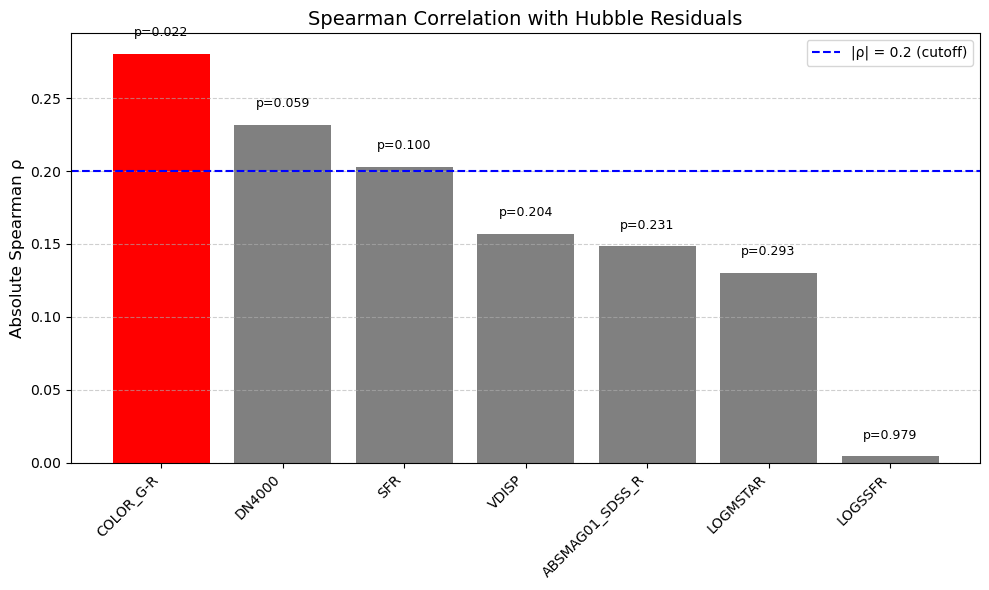

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# === Spearman correlation results ===
features = [
    "COLOR_G-R", "DN4000", "SFR", "VDISP",
    "ABSMAG01_SDSS_R", "LOGMSTAR", "LOGSSFR"
]
rho_values = [
    -0.2804, -0.2317, 0.2029, -0.1570,
    0.1483, -0.1303, 0.0043
]
p_values = [
    0.02153, 0.05925, 0.09966, 0.2044,
    0.2309, 0.2934, 0.9785
]

# === Make DataFrame for sorting and plotting ===
df = pd.DataFrame({
    "Feature": features,
    "Rho": rho_values,
    "Abs Rho": np.abs(rho_values),
    "p-value": p_values
}).sort_values("Abs Rho", ascending=False)

# === Plot ===
plt.figure(figsize=(10, 6))
colors = ["red" if p < 0.05 else "gray" for p in df["p-value"]]
bars = plt.bar(df["Feature"], df["Abs Rho"], color=colors)

# Annotate bars with p-values
for bar, pval in zip(bars, df["p-value"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01,
             f"p={pval:.3f}", ha='center', va='bottom', fontsize=9)

# Add cutoff line at |rho| = 0.2
plt.axhline(0.2, color='blue', linestyle='--', label='|ρ| = 0.2 (cutoff)')

# Final plot touches
plt.ylabel("Absolute Spearman ρ", fontsize=12)
plt.title("Spearman Correlation with Hubble Residuals", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()